In [6]:

from scipy.stats.qmc import LatinHypercube as LHSampler
from matplotlib import pyplot as plt
import numpy as np
from src.utils import plotLHS, concat, H
from src.eLHS_old import *
import json
from math import floor, ceil
from src.fancyplotter import usePlotSampleSet, SampleSetPlot

# setup sampler
LHS = LHSampler(d = 2)
err = 1e-9

In [139]:
# could be interesting which distribution the PeLHS grade has while varying M and N
N1, M1 = 200, 77
ss2 = LHSampler(d=5).random(N1)
plotLHS(ss2, grid=True, highlight=True)
print("Grade (mode 3): ", grade(ss2))

Grade (mode 3):  1.0


In [140]:
# plotting the partial-eLHS ("Partiale")
pss2 = empty_expansion(ss2, M1)
plotLHS(pss2, grid=False, highlight=True)
print("Partial grade 1: ", grade(pss2, n = N1 + M1, mode=1))
print("Partial grade 3: ", grade(ss2, n = N1 + M1, mode=3))


Partial grade 1:  0.6490974729241877
Partial grade 3:  0.6490974729241877


In [141]:
exp = eLHS(ss2, M1)
elhs2 = concat(ss2, exp["expansion"])
plotLHS(elhs2, grid=True, highlight=True)

exp_up = M1/(N1 + M1)
print("LHS grade: \t", grade(ss2) * N1)
print("PeLHS grade: \t", grpss2 := grade(ss2, n = N1 + M1))
print("eLHS grade: \t", grelhs2 := exp['grade'])
print("Total Upgrade: \t" , grelhs2 - grpss2, " | Expected: ", exp_up, " | ", 
      ("✅" if -err < grelhs2 - grpss2 - exp_up < err else "❌"))


LHS grade: 	 200.0
PeLHS grade: 	 0.6490974729241877
eLHS grade: 	 0.9270758122743682
Total Upgrade: 	 0.27797833935018046  | Expected:  0.2779783393501805  |  ✅


### TEST PLAYGROUND

Limited Sample Size Problem

## Experiment: max gr(s, Q)

In [47]:
N, P = 100, 3
s = LHSampler(d = P).random(N)

In [48]:
K = 4
qs = np.arange(0, K * N + 1)
ys = np.array([ grade(s, n = N + q, mode = 3) + q/(N + q) for q in qs ])

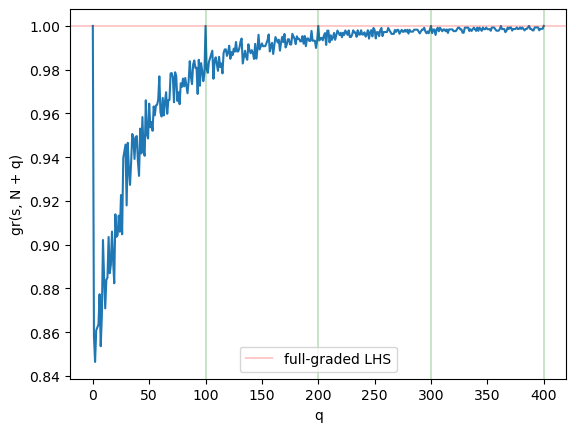

In [49]:

# plt.scatter(qs, ys, s = 1)
plt.plot(qs, ys)
plt.xlabel("q")
plt.ylabel("gr(s, N + q)")
plt.axhline(1, color='red', linestyle='-', linewidth = 0.3, label = "full-graded LHS")
for k in range(1, K + 1):
    plt.axvline(k * N, color='green', linestyle='-', linewidth = 0.3)
plt.legend()
plt.show()


In [ ]:
# finding the optimal Qs
xys = np.column_stack([qs, ys])
Qs = np.array(xys[xys[:, 1] == 1] [:, 0], dtype=int)
print(Qs)


[  0 100 200 300 400]


In [ ]:
painQs = Qs[Qs[:] % N != 0]

if len(painQs) > 0:
    for q in painQs:
        expansion = eLHS(s, q)
        print("-" * 20)
        print("N: ", N, "\tQ: ", q)
        print("Is it a full-grade expansion?", expansion["grade"], " | ", 
            "✅" if expansion["grade"] == 1.0 else "❌")
else:
    print(" ⚠️ We found no non-trivial expansion")
    

 ⚠️ We found no non-trivial expansion


# 1000 samples LSSP experiment
This experiment has taken 700 mins to complete

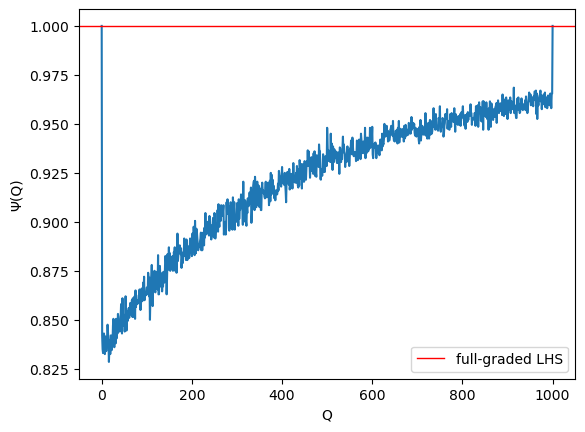

In [136]:

with open('data/PSI-1000-experiment.json') as f:
    e = json.load(f)
    xys = np.array(e['xys'])
    plt.plot(xys[:, 0], xys[:, 1]/1000 + 1)
    plt.xlabel("Q")
    plt.ylabel("Ψ(Q)")
    plt.axhline(1, color='red', linestyle='-', linewidth = 1, label = "full-graded LHS")
    plt.legend()
    plt.show()

## Expanded Grade Prediction

In [142]:
def expandedGrade(lhs: np.ndarray, M: int):
    N, P = lhs.shape
    return 1 - np.sum(overlaps(lhs, M)) / (P * (N + M))

def overlaps(lhs: np.ndarray, M: int):
    N, P = lhs.shape
    ovs = np.zeros((P))
    for j in range(P):
        xs = np.sort(lhs[:, j])
        for i in range(N - 1):
            ovs[j] += H(ceil(xs[i] * (N + M)) / (N + M) - xs[i+1])
    return ovs


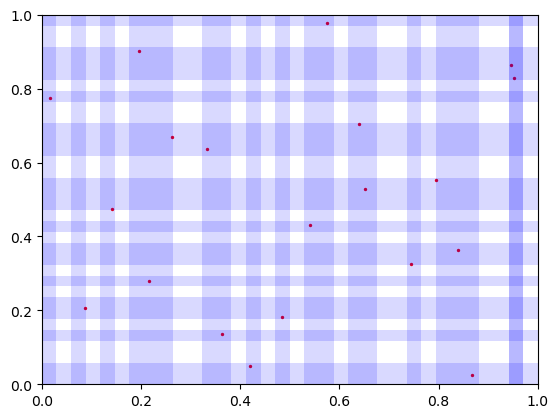

Overlaps:  [1. 0.]


In [ ]:
N3, M3 = 20, 14
ss3 = LHS.random(N3)
# plotting the empty expansion of ss3
plotLHS(empty_expansion(ss3, M3), grid = False, highlight = True)
print("Overlaps: ", overlaps(ss3, M3))

In [ ]:
prediction = expandedGrade(ss3, M3)
exp3 = eLHS(ss3, M3)
elhs3 = concat(ss3, exp3["expansion"])
print(prediction, exp3["grade"], "✅" if -err < prediction - exp3["grade"] < err else "❌")

0.9852941176470589 0.9852941176470589 ✅


In [ ]:
pain1 = np.array([
    [0.125, 0.125],
    [0.375, 0.375],
    [0.625, 0.625],
    [0.875, 0.875]
])

pain2 = np.array([ [pain1[i][0], pain1[i][1], (2*i + 1/ (2 * len(pain1))) ] for i in range(len(pain1)) ])

print(grade(pain1))
print(grade(pain2))


1.0
0.75


## NICE PLOTS

In [2]:
N13, M13 = 15, 5
ss13 = LHS.random(N13)
exp13 = eLHS(ss13, M13)
expss13 = concat(ss13, exp13['expansion'])

In [17]:
## read from file
# with open('./data/algoss.json', 'w') as f:
#     json.dump(ss13.tolist(), f)
# with open('./data/algoss_exp.json', 'w') as f:
#     json.dump(exp13["expansion"].tolist(), f)

In [3]:
## load from file 
# with open('./data/algoss.json') as f:
#     ss13 = np.array(json.load(f))

# with open('./data/algoss_exp.json') as f:
#     exp13 = {"expansion": None}
#     exp13["expansion"] = np.array(json.load(f))

# expss13 = concat(ss13, exp13['expansion'])

In [22]:
s=40
multiplot = usePlotSampleSet([], N13 + M13, grid=False, interval_labels=True)
monoplot = usePlotSampleSet(ss13, s=s, m="x", c="green", grid=True, highlight=True, interval_labels=True)

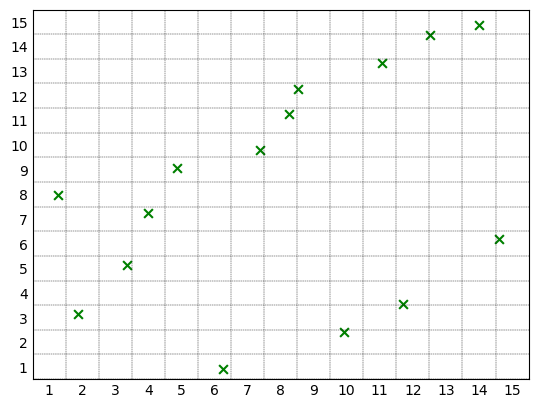

In [30]:
monoplot(highlight=False, 
        overlaps=False, 
        voids=False, voids_c="blue", voids_a=.25,
        save=False, filepath="./DOCS/src/imgs/algo1.png")

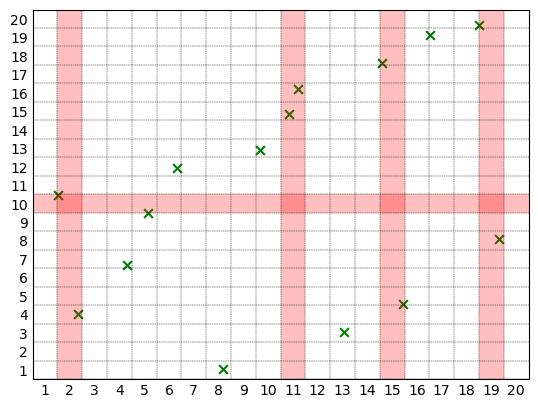

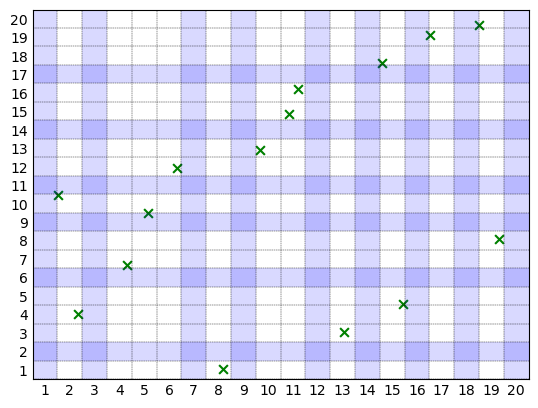

In [29]:

# plotting overlaps of the starting LHS over N+M grid (without voids)
monoplot(Ntot=N13 + M13, highlight=False, 
        overlaps=True, overlaps_c="red", overlaps_a=.25,
        voids=False, voids_c="blue", voids_a=.25, 
        exclusive_labels=False,
        save=False, filepath="./DOCS/src/imgs/algo2.png")

#plotting voids of the starting LHS over N+M grid (without overlaps)
monoplot(Ntot=N13 + M13, highlight=False, 
        overlaps=False, overlaps_c="red", overlaps_a=.25,
        voids=True, voids_c="blue", voids_a=.15, exclusive_labels=False,
        save=False, filepath="./DOCS/src/imgs/algo3.png")

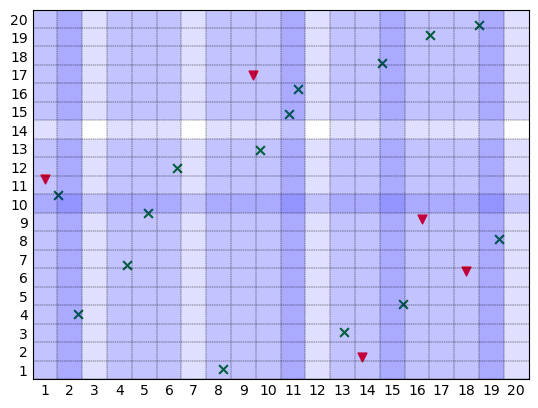

In [25]:

# hihglighting starting LHS and expansion set (not used)
ha = 0.125
multiplot([
    SampleSetPlot(
        ss13, c="green", m="x", s=s,
        highlight=True, highlight_c="blue", highlight_a=ha,
        overlaps=False, overlaps_c="red", overlaps_a=.15,
        voids=False, voids_c="green", voids_a=.15),
    SampleSetPlot(
        exp13["expansion"], c="red", m="v" ,s=s,
        highlight=True, highlight_a=ha,
        overlaps=False, overlaps_c="red", overlaps_a=.15,
        voids=False, voids_c="green", voids_a=.15)
    ], Ntot=N13+M13, exclusive_labels=False, grid=True,
    save=False, filepath="./DOCS/src/imgs/algo4.png")

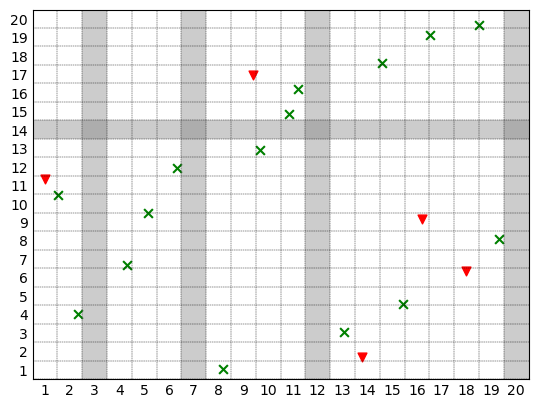

In [27]:
def vacancies_highlight(ss:np.ndarray) -> np.ndarray:
    N = ss.shape[0]
    holder = SampleSetPlot(ss)
    ovs = holder.trace_overlaps(N)
    vacancies = [[],[]]
    vacancies[0] = np.array(range(1, N + 1))[ovs[:, 0] == 0]
    vacancies[1] = np.array(range(1, N + 1))[ovs[:, 1] == 0]
    vacancies[0] = (vacancies[0] - 0.5)/N
    vacancies[1] = (vacancies[1] - 0.5)/N
    # vacancies = np.array(vacancies)
    v_holders = np.array([
        *[[vacancies[0][i], -1] for i in range(len(vacancies[0]))],
        *[[-1, vacancies[1][i]] for i in range(len(vacancies[1]))]
    ], dtype=object)
    return v_holders

#plotting voids after expansion
multiplot([
    SampleSetPlot(
        ss13, c="green", s=s, m="x"),
    SampleSetPlot(
        exp13["expansion"], c="red", s=s, m="v"),
    SampleSetPlot(
        vacancies_highlight(expss13), s=0,
        highlight=True, highlight_c="grey",highlight_a=0.4)
    ], Ntot=N13+M13, exclusive_labels=False, grid=True,
    save=False, filepath="./DOCS/src/imgs/algo4.png")


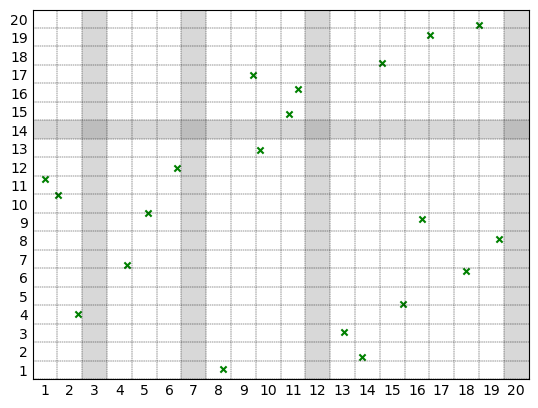

In [10]:
# plotting voids of the expanded set but without distinguishing the starting 
# set's points and the expansion set's ones (everything is mixed up)
monoplot(
    concat(ss13, exp13["expansion"]), c="green", s=20, m="x",
    highlight=False, highlight_c="blue", highlight_a=0.15,
    overlaps=False, overlaps_c="red", overlaps_a=.15,
    voids=True, voids_c="grey", voids_a=.3, Ntot=N13+M13, 
    exclusive_labels=False, grid=True,
    save=False, filepath="./DOCS/src/imgs/algo4.png")

### Real plots ahead

In [18]:
# poor LHS sampling: diagonal design
N_diag = 20
# diag = np.array([ [(2*i + 1)/(2*N_diag), (2*i + 1)/(2*N_diag)] for i in range(N_diag)])
diag = np.array([ i/N_diag for i in range(N_diag)])
diag = np.column_stack((diag + np.random.uniform(0,1/N_diag,N_diag), diag + np.random.normal(1/(2*N_diag),10e-8, N_diag)))
tmpplotLHS(diag, True, False)


NameError: name 'tmpplotLHS' is not defined

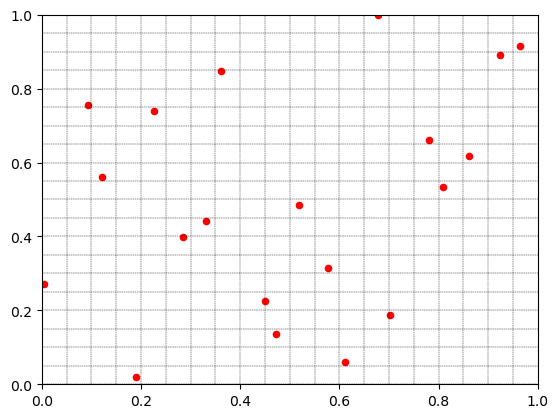

In [ ]:
# good LHS
good_LHS = LHS.random(N_diag)
tmpplotLHS(good_LHS, True, False)

## LHS getting worst when applying multistage approach

In [ ]:
N10 = 10
ss10 = LHS.random(N10)

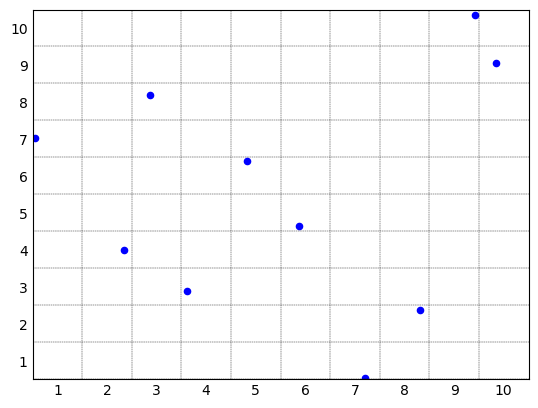

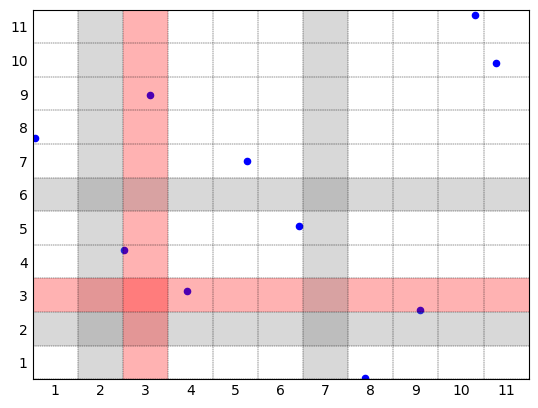

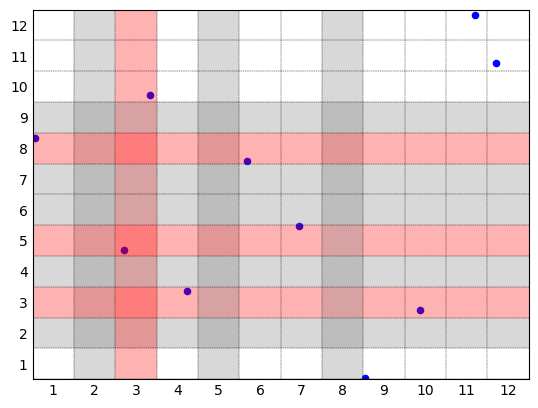

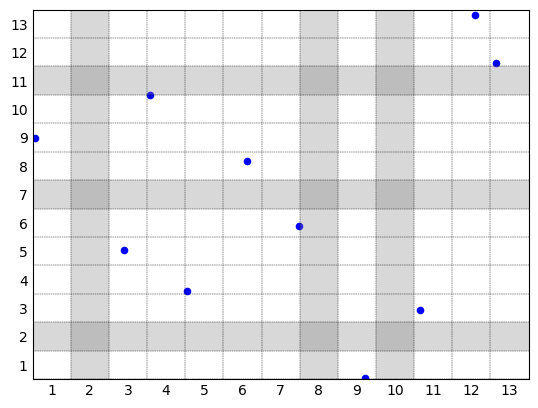

In [ ]:
fp = "/Users/alessandro/projects/~LAB/Thesis/docs/src/imgs/example_overlaps"
tmpplotLHS(ss10, grid=True, overlaps=True, interval_labels=True, caption=f'N1 = {N10}', save=True, filepath=fp + "1.png")
tmpplotLHS(ss10, grid=True, overlaps=True, Ntot=N10 + 1, interval_labels=True, caption=f'N2 = {N10}', save=True, filepath=fp + "2.png")
tmpplotLHS(ss10, grid=True, overlaps=True, Ntot=N10 + 2, interval_labels=True, caption=f'N3 = {N10}', save=True, filepath=fp + "3.png")
tmpplotLHS(ss10, grid=True, overlaps=True, Ntot=N10 + 3, interval_labels=True, caption=f'N4 = {N10}', save=True, filepath=fp + "4.png")

# TEST FANCY PLOTS

In [ ]:
N12, M12 = 10, 5
ss12 = LHS.random(N12)
exp12 = eLHS(ss12, M12)

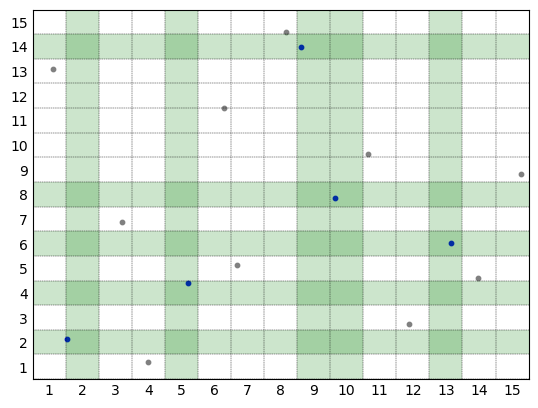

In [ ]:
ssplotter = usePlotSampleSet(
    [
        SampleSetPlot(ss12, c="grey", s=10, highlight=False), 
        SampleSetPlot(exp12['expansion'], c="blue", s=10, 
            highlight=True, 
            highlight_c="green",
            highlight_a=.2) 
    ], N12 + M12, 
    grid=True,
    interval_labels=True,
    # caption="Expansion test",
)
ssplotter()
# ssplotter = usePlotSampleSet(points=ss12, Ntot=N12)

# Quasi-LHS expansion test

In [32]:
P, B = 2, (1000, 432, 732, 999, 4321) 
LHS1 = LHSampler(d=P)
stages = [[
    SampleSetPlot(LHS1.random(B[0]), m="x", c="green", s=15, overlaps=True)
]]
plotter1 = usePlotSampleSet([], grid=np.sum(B)<=40, interval_labels=np.sum(B)<=40)

for i in range(1, len(B)):
    if len(stages[i-1]) == 1:
        prev = stages[i-1][0].points
    else:
        prev = concat(stages[i-1][0].points, stages[i-1][1].points)
    exp = eLHS(prev, B[i])["expansion"]
    stages.append([
        SampleSetPlot(prev, m="x", c="green", s=15, overlaps=True),
        SampleSetPlot(exp, m="v", c="blue", s=15, overlaps=True, overlaps_c="purple")
    ])

Bs: (1000, 432, 732, 999, 4321)
Starting with:  1000
Grade:  0.9406424581005587
Grade:  0.9482439926062847
Grade:  0.9438823901359469
Grade:  0.9856360235168359


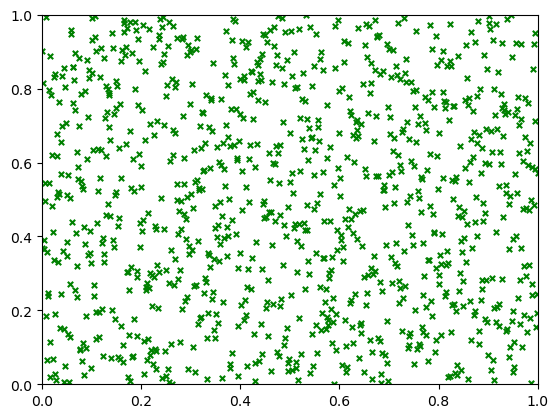

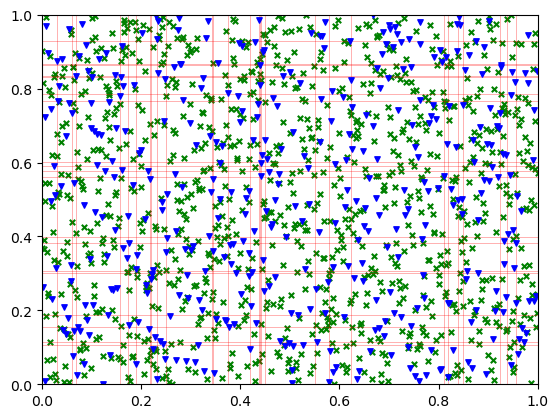

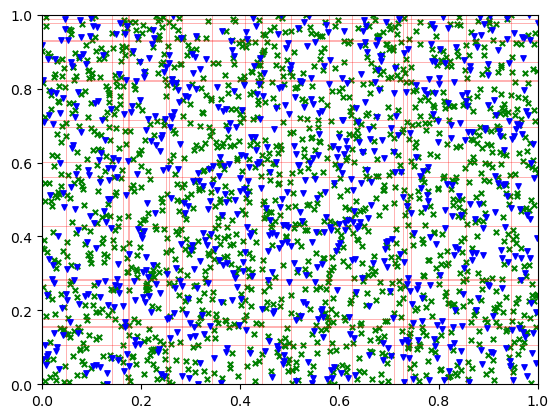

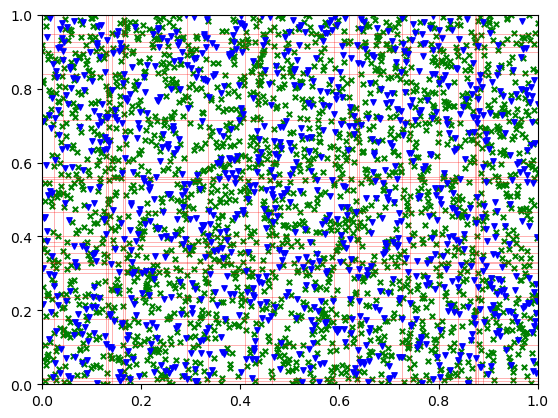

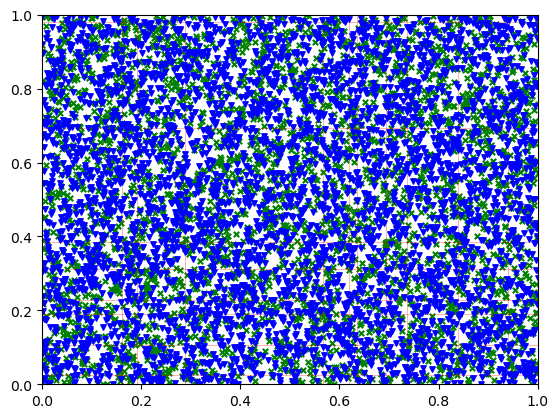

In [33]:
print("Bs:", B)
print("Starting with: ", B[0])
plotter1(stages[0])
for stage in stages[1:]:
    print("Grade: ", grade(concat(stage[0].points, stage[1].points)))
    plotter1(stage)